In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import pylab             as pl
import numpy             as np
import matplotlib.pyplot as plt

In [3]:
os.environ['CODE_ROOT'] = os.environ['HOME'] + '/DESI/'

sys.path.append(os.environ['HOME'])
sys.path.append(os.environ['CODE_ROOT'])

In [4]:
import pubplot

from   vmaxer        import vmaxer
from   astropy.table import Table
from   smith_kcorr   import test_plots, test_nonnative_plots
from   cosmo         import distmod
from   findfile      import findfile
from   tmr_kcorr     import tmr_kcorr

In [5]:
dryrun  = False
version = 'GAMA4'
survey  = 'gama'

##  kE Catalog

In [6]:
fpath   = findfile(ftype='kE', version=version, dryrun=dryrun, survey=survey)
kE = Table.read(fpath)
kE

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,ZSURV,LUMDIST,DISTMOD,FIELD,IN_D8LUMFN,CONSERVATIVE,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QZERO,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,Mpc,,,,,,,,,,,mag,mag,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,,mag
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float32,float64,float64,bytes3,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
186172,587725041703977119,183.36147981,-1.47603946,18.018501,0.12797,4,G12_Y1_GS2_031,6,19.953535,18.68423,18.02194,17.65001,17.319805,0.12797,422.00428891516066,38.12658432403494,G12,0,0,-373.3596109871224,-21.929760909860484,-9.63710564553418,373.49266132369706,19.32584906979296,-10.046433711321933,0.6622906,18.018501,0.6179363475045239,0,4,-0.08313869576492161,-0.0387844701493283,0.13464877197759895,0.2319143342712049,0.5650250108265112,2.12,-0.1241309,-0.27129638,-20.118600917050305,-19.971435432323876,-20.242731814274254,38.13710219878859,38.26123309601254,37.98993671406216,-0.08403850869914967,-0.04075469598413951,0.13268636966305145,0.22442059372952378,-20.116638514735758
240048,587726014549721294,220.35365668,1.52173696,18.241734,0.08419,4,G15_Y1_GN2_360,6,20.009663,18.799726,18.24281,17.873219,17.704176,0.08419,269.2245786693688,37.1505735298624,G15,0,0,-189.16752438979816,-160.73053177087175,6.59439869998412,190.29078744208968,159.40758848267123,6.38585703999604,0.5569172,18.241734,0.576066899703401,0,4,-0.11517983710639552,-0.13432954625766527,0.09697736064597949,0.12154110186601416,0.5323534493317231,2.12,-0.08166431,-0.1784828,-18.924153030577386,-18.827334538760866,-19.005817339482988,37.16588658160278,37.24755089050838,37.069068089786256,-0.11626642523293836,-0.13596649576767633,0.10045845312926276,0.12920879394598694,-18.92763412306067
220544,587726013996073093,182.08402727,1.54607143,18.739721,0.21431,4,G12_Y1_EX2_399,6,21.580355,19.697283,18.532803,17.982117,17.715078,0.21431,747.1847629934595,39.367140034690664,G12,0,0,-614.6854523330815,-22.367903669549293,16.60170277623398,614.8443019907271,18.081253480015427,15.927885662972182,1.1644802,18.739721,0.860723106322338,0,6,0.032430857833908894,0.3361879608621568,0.2602059402908299,0.6963203204900505,0.7283658291513653,0.8,-0.2078807,-0.171448,-20.679743971168705,-20.71617666953773,-20.88762467676372,39.41946526938648,39.627345974981495,39.455897967755504,-0.037978720798954674,0.18455385527658036,0.17874615756324644,0.44972914499024363,-20.59828418844112
696407,587722984422768817,176.2539266,0.96075327,19.308483,0.26544,4,G12_Y2_032_143,4,22.646307,20.605484,19.284819,18.736702,18.39961,0.26544,953.7866843264428,39.89725627509861,G12,0,0,-752.0032833648487,49.23714171213921,12.638006887407187,751.655077762792,-54.479547099735385,11.814252189604048,1.3206654,19.308483,0.8686673789027555,0,6,0.09950521360674491,0.55150319420106,0.32713609112394704,0.9145241664831578,0.7332772841378595,0.8,-0.2574768,-0.212352,-20.658432435802638,-20.703557249716937,-20.915909242443263,39.966915559581935,40.22439236622256,40.012040373496234,-0.010841116826718789,0.3296346695222599,0.20588376153548232,0.5948099592359232,-20.537180106214173
7789,588848900986110711,179.30135256,0.76409281,19.518755,0.26327,4,G12_Y2_033_140,5,21.71862,20.247671,19.471909,19.237104,19.014057,0.26327,944.8162862114375,39.87673685396928,G12,0,0,-747.7910677810731,9.118790502094468

In [7]:
def color_plot(ctype, xlabel=None, max_col=1.0):
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    idx    = np.digitize(kE['MCOLOR_0P0'], np.arange(-23., -17., 1.))

    if xlabel == None:
        xlabel = ctype
    
    for count, jj in enumerate(np.unique(idx)):
        sample  = kE[(idx == jj) & (kE['MCOLOR_0P0'].data >= -23.) & (kE['MCOLOR_0P0'].data <= -17.)]
        nsample = len(sample)

        if nsample == 0:
            continue
    
        dbin = 0.025
        bins = np.arange(-0.5, max_col, dbin)
    
        ns, _ = np.histogram(sample[ctype], bins=bins)
    
        centres = bins[:-1] + dbin/2.
    
        plt.plot(centres, ns / nsample / dbin, lw=1, color=colors[count], label=r'{:.0f} $\leq M_r \leq$ {:.0f}'.format(sample['MCOLOR_0P0'].min(),\
                                                                                                                 sample['MCOLOR_0P0'].max()))

    plt.axvline(0.63, c='black', lw=0.5)

    plt.xlabel(xlabel)
    plt.ylabel(r'$p$({})'.format(ctype), fontsize=14)
    
    plt.xlim(-0.1, max_col)
    plt.ylim(0., 10.)
    
    plt.legend(frameon=False)

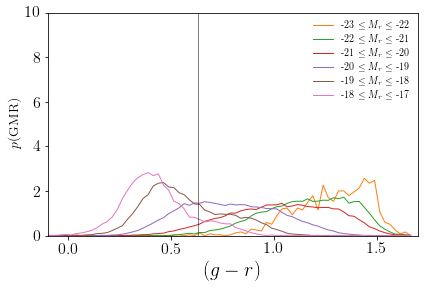

In [8]:
color_plot('GMR', '$(g-r)$', max_col=1.7)

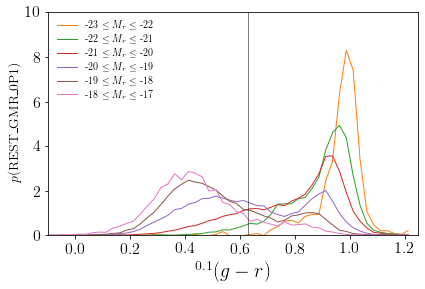

In [9]:
color_plot('REST_GMR_0P1', '$^{0.1}(g-r)$', max_col=1.25)

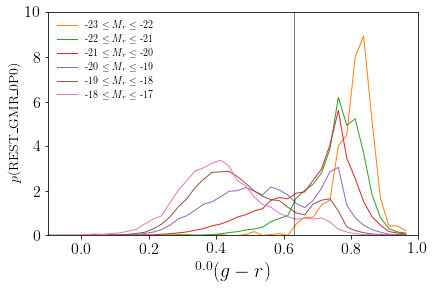

In [10]:
color_plot('REST_GMR_0P0', '$^{0.0}(g-r)$')

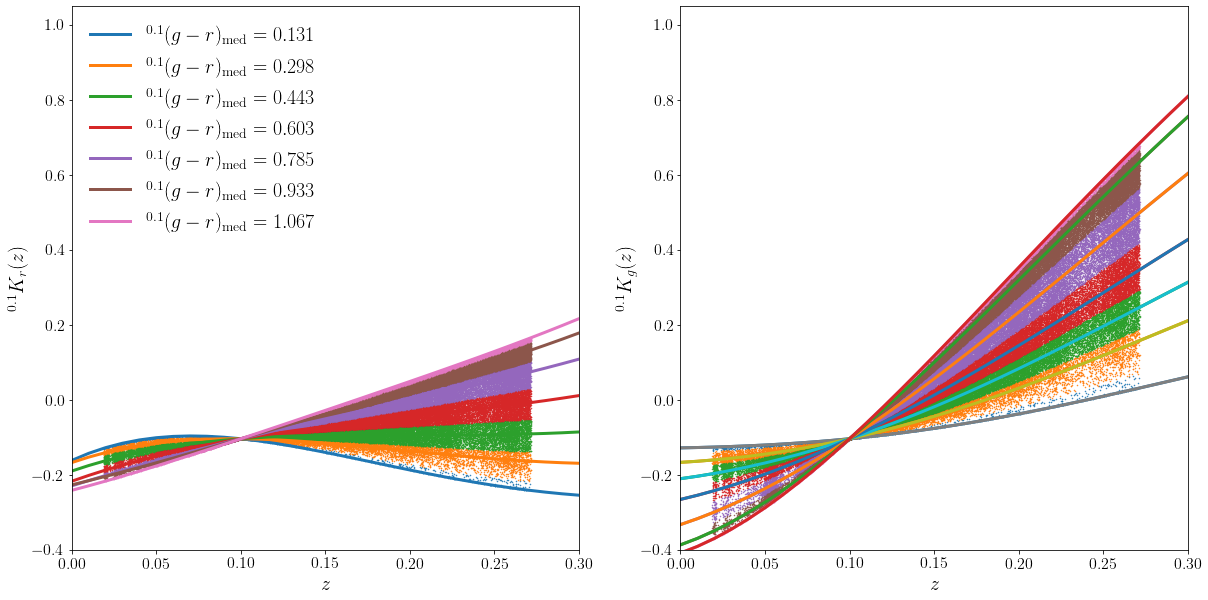

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))

test_plots(axes)

for idx in np.unique(kE['REST_GMR_0P1_INDEX']):
    isin = kE['REST_GMR_0P1_INDEX'] == idx
      
    n_in = np.count_nonzero(isin)
        
    axes[0].scatter(kE['ZSURV'][isin], kE['KCORR_R0P1'][isin], s=0.25)
    axes[1].scatter(kE['ZSURV'][isin], kE['KCORR_G0P1'][isin], s=0.25)
    
    axes[0].set_xlim(0, 0.3)
    axes[1].set_xlim(0, 0.3)

    axes[0].set_ylim(-0.4, 1.05)
    axes[1].set_ylim(-0.4, 1.05)
    
axes[0].legend(ncol=1, frameon=False, loc=2, fontsize=20)
axes[1].get_legend().remove()

In [12]:
colors    = plt.rcParams['axes.prop_cycle'].by_key()['color']

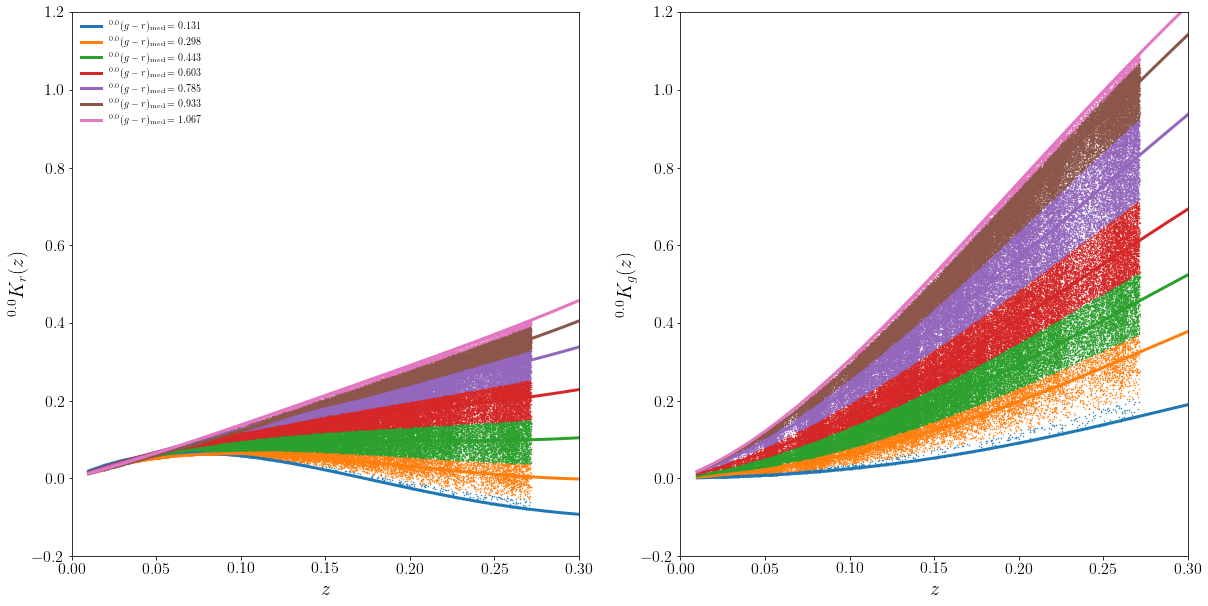

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))

test_nonnative_plots(axes, 0.0)

for idx in np.unique(kE['REST_GMR_0P1_INDEX']):
    isin = (kE['REST_GMR_0P1_INDEX'] == idx)
        
    axes[0].scatter(kE['ZSURV'][isin], kE['KCORR_R0P0'][isin], s=0.25)
    axes[1].scatter(kE['ZSURV'][isin], kE['KCORR_G0P0'][isin], s=0.25)
    
    axes[0].set_xlim(0, 0.3)
    axes[1].set_xlim(0, 0.3)

    axes[0].set_ylim(-0.2, 1.2)
    axes[1].set_ylim(-0.2, 1.2)

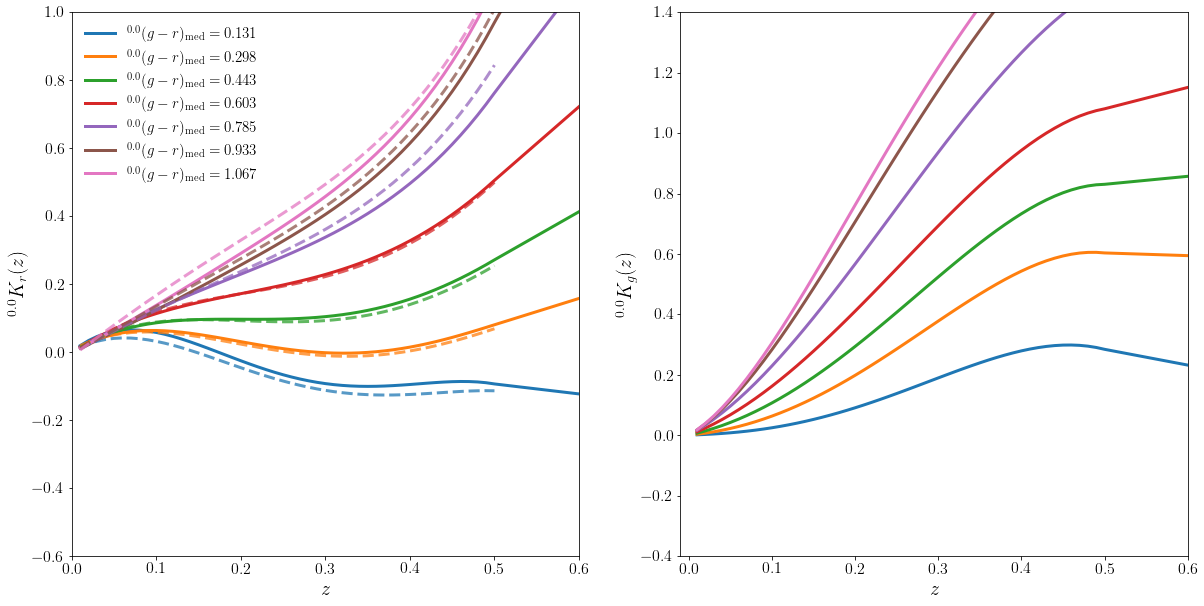

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))

test_nonnative_plots(axes, 0.0)

kcorr_tmr = tmr_kcorr()

z       = np.arange(0.01,0.501,0.01)
cols    = [0.158, 0.298, 0.419, 0.553, 0.708, 0.796, 0.960]

for i, c in enumerate(cols):
    k  = kcorr_tmr.ref_eval(c, z)
    axes[0].plot(z, k, '--', c=colors[i], alpha=0.75)
    
axes[0].legend(ncol=1, frameon=False, loc=2, fontsize=15)

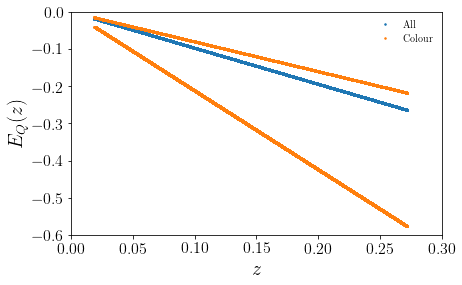

In [32]:
pl.plot(kE['ZSURV'], kE['EQ_ALL_0P0'], marker='.', lw=0.0, label='All', markersize=3)
pl.plot(kE['ZSURV'], kE['EQ_COLOR_0P0'], marker='.', lw=0.0, label='Colour', markersize=3)

pl.xlabel(r'$z$')
pl.ylabel(r'$E_Q(z)$')

pl.xlim(0.0,0.3)
pl.ylim(-0.6, 0.0)

pl.legend(frameon=False)

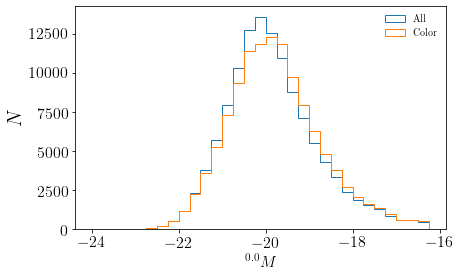

In [16]:
_ = pl.hist(kE['MALL_0P0'], histtype='step', bins=np.arange(-24., -16.0, 0.25), label='All')
_ = pl.hist(kE['MCOLOR_0P0'], histtype='step', bins=np.arange(-24., -16.0, 0.25), label='Color')

pl.xlabel(r'$^{0.0}M$', fontsize=16)
pl.ylabel('$N$')

pl.legend(frameon=False)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


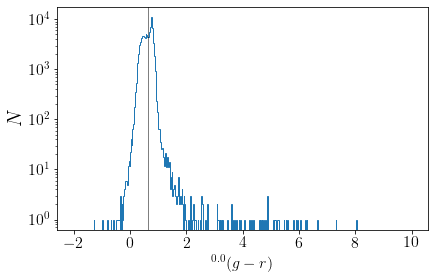

In [34]:
_ = pl.hist(kE['REST_GMR_0P0'], histtype='step', bins=np.arange(-2., 10.0, 0.025))

pl.xlabel(r'$^{0.0}(g-r)$', fontsize=16)
pl.ylabel('$N$')

pl.axvline(0.63, c='k', lw=0.5)

pl.yscale('log')
pl.legend(frameon=False)

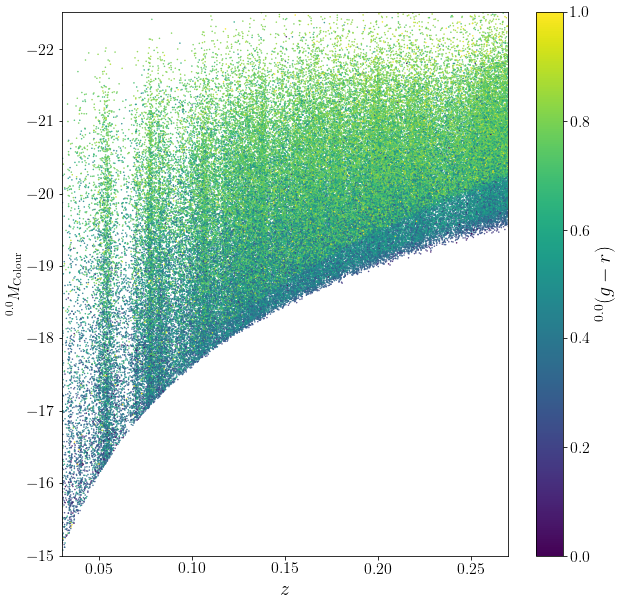

In [14]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

pl.sca(ax)

plt.scatter(kE['ZSURV'], kE['MCOLOR_0P0'], c=kE['REST_GMR_0P0'], s=0.25, vmin=0.0, vmax=1.0)
plt.xlabel(r'$z$')
plt.ylabel(r'$^{0.0}M_{\rm Colour}$', fontsize=16)

plt.xlim(0.03, 0.27)
plt.ylim(-15., -22.5)

plt.colorbar(label = r'$^{0.0}(g-r)$')

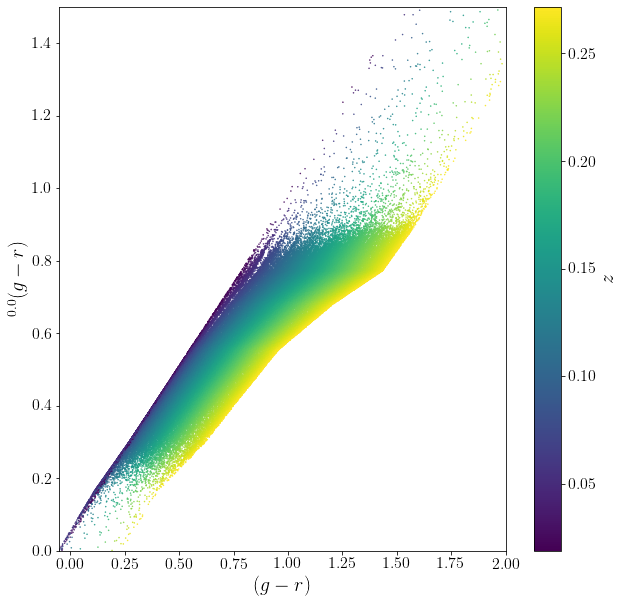

In [15]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
pl.sca(ax)

plt.scatter(kE['GMR'], kE['REST_GMR_0P0'], c=kE['ZSURV'], s=0.25)
plt.xlabel(r'$(g-r)$')
plt.ylabel(r'$^{0.0}(g-r)$')
plt.xlim(-0.05, 2.0)
plt.ylim( 0.0, 1.5)
plt.colorbar(label='$z$')

# Done.